# Distance
Meaure the space between two objects.

Spacial distances: 
* Manhattan, Euclidian, and their generalization to Minkowski 
* Mahalanobis incorporates covariance

Distance analogy applied to strings or time series:
* Hamming distance: number of different letters or values
* Edit distance: min number of operations required to transform A to B
* Levenshtein distance: edit distance specifically using only insert, delete, substitute.

Use a tiny dataset from this web page: 
[Calculating Mahalanobis](https://jamesmccaffrey.wordpress.com/2017/11/09/example-of-calculating-the-mahalanobis-distance/#:~:text=The%20mean%20of%20the%20data,is%205.33%20(no%20units).)

## Formulas
Manhattan distance (x,y) in 2D:    
$d = |x_1-y_1|+|x_2-y_2|$   

Euclidian distance (x,y) in 2D:  
$d = \sqrt( (x_1-y_1)^2 + (x_2-y_2)^2 )$   
In python, use numpy.linalg.norm(x-y) 

Minkowski distance (x,y) in 2D, for some p:     
$d = [|x_1-y_1|^p + |x_2-y_2|^p]^{\frac{1}{p}}$   

Mahalanobis distance (x,y) in 2D using the covariance matrix:    
$(\bar{x}-\bar{y})^T\Sigma^{-1}(\bar{x}-\bar{y})$

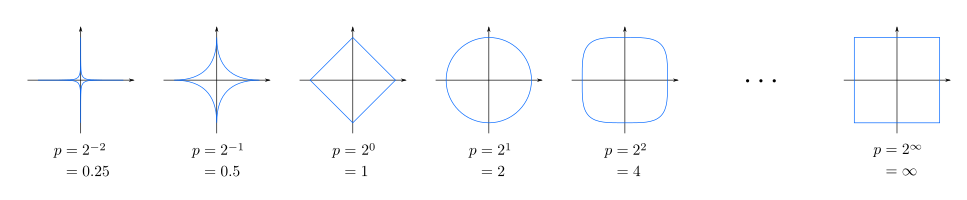
Points (blue) having unit distance from the origin.
Source: [wikipedia](https://en.wikipedia.org/wiki/Minkowski_distance)

## Euclidean vs Mahalanobis distance
Imagine a cloud of points that fill an ellipse and a point P outside it.

Points at Euclidean distance from the mean form a circle, ignoring the higher variance along the major axis. Far points along the major axis are incorrectly called outliers.

Points at Mahalanobis distance from the mean form an elipse, incorporating the higher variance along the major axis. Close points along the minor axis are correctly called outliers.

These two are equivalent:
Measure the Mahalanobis distance in the original basis.
Measure the Euclidean distance along a PCA basis, but normalize by stdev of each principal component. This follows from the formulae. 

## Computing Mahalanobis distance
Imagine a cloud of points that fill an ellipse and a point P outside it.

Points at Euclidean distance from the mean form a circle, ignoring the higher variance along the major axis.

Points at Mahalanobis distance from the mean form an elipse, incorporating the higher variance along the major axis.


In [1]:
import numpy as np

In [2]:
# 3D data: X = height, Y = score, Z = age
X,Y,Z = 0,1,2
data=[]
data.append( (64,580,29) )
data.append( (66,570,33) )
data.append( (68,590,37) )
data.append( (69,660,46) )
data.append( (73,600,55) )
ary = np.asarray(data)
ary

array([[ 64, 580,  29],
       [ 66, 570,  33],
       [ 68, 590,  37],
       [ 69, 660,  46],
       [ 73, 600,  55]])

In [3]:
# Mean, variance, co-variance
means = np.mean(ary,axis=0)
print('means:',means)
var_pop = np.var(ary,axis=0)  # maximum likelihood estimate, assumes we have entire population
var = np.var(ary,axis=0,ddof=1)  # unbiased estimate, assumes we have a random sample
print('variance of this population:',var_pop)
print('variance of this sample:',var)


means: [ 68. 600.  40.]
variance of this population: [   9.2 1000.    88. ]
variance of this sample: [  11.5 1250.   110. ]


In [4]:
# Verify we can get the same answers without numpy
def mean_variance(data):
    dof = 1
    N = len(data)
    mean = sum(data)/N
    ss = 0
    for x in data:
        dev = x - mean
        sq = dev**2
        ss += sq
    var = ss/(N-dof)
    return mean,var
print('Mean and variance of X, Y, Z:')
Xmean,Xvar = mean_variance(ary[:,0])
Ymean,Yvar = mean_variance(ary[:,1])
Zmean,Zvar = mean_variance(ary[:,2])
print('X mean & variance:',Xmean,Xvar)
print('Y mean & variance:',Ymean,Yvar)
print('Z mean & variance:',Zmean,Zvar)

Mean and variance of X, Y, Z:
X mean & variance: 68.0 11.5
Y mean & variance: 600.0 1250.0
Z mean & variance: 40.0 110.0


In [5]:
covXY = np.cov(ary[:,0],ary[:,1])
covXY

array([[  11.5,   50. ],
       [  50. , 1250. ]])

In [6]:
covXZ = np.cov(ary[:,0],ary[:,2])
covXZ

array([[ 11.5 ,  34.75],
       [ 34.75, 110.  ]])

In [7]:
covYZ = np.cov(ary[:,1],ary[:,2])
covYZ

array([[1250.,  205.],
       [ 205.,  110.]])

In [8]:
cov = np.array([
    [Xvar,covXY[0,1],covXZ[0,1]],
    [covXY[0,1],Yvar,covYZ[0,1]],
    [covXZ[0,1],covYZ[0,1],Zvar]])
cov

array([[  11.5 ,   50.  ,   34.75],
       [  50.  , 1250.  ,  205.  ],
       [  34.75,  205.  ,  110.  ]])

Need the inverse of the 3x3 covariance matrix. See [how to](https://www.wikihow.com/Find-the-Inverse-of-a-3x3-Matrix)

In [9]:
inv_cov = np.linalg.inv(cov)
inv_cov

array([[ 3.68851865e+00,  6.27308946e-02, -1.28214415e+00],
       [ 6.27308946e-02,  2.21900278e-03, -2.39526742e-02],
       [-1.28214415e+00, -2.39526742e-02,  4.58770977e-01]])

For a previously unseen data point, compute its distance to the mean.

In [10]:
def mahalanobis_distance(point, means, cov):
    inv = np.linalg.inv(cov) 
    dev = np.subtract(point,means) # X - mu elementwise vector subtraction
    prod = dev.dot(inv).dot(dev)   # (deviation)(inverse Sigma)(deviation)
    dist = np.sqrt(prod)
    return dist
unseen = [66,640,44]
mean = [Xmean,Ymean,Zmean]
md = mahalanobis_distance (unseen, mean, cov)
print('mean:',mean)
print('unseen:',unseen)
print('distance:',md)

mean: [68.0, 600.0, 40.0]
unseen: [66, 640, 44]
distance: 5.334540488762537


That matches the answer on the web page.

## Similarity
cosine similarity = (A dot B) / (||A|| ||B||)

### Similarity of points that have categorical features
Used for comparing documents by word count, or sentences by letter count.

Use the inverse occurrence frequency.   
This is the sum of the matching features, weighted by inverse frequency.   
If X and Y are different at feature i, add zero.  
If X and Y have the same feature i, add a positive amount.  
If 1/4 of the data have this same value, add 1 / (1/4 * 1/4) = 16.   
Thus, if X and Y share a rare value, their similarity is high.   